## A1: HACKER STATISTICS

Vamos a simular el lanzamiento de dos dados 100 veces:

* mediante un histograma indica los números a los que más me sale a cuenta apostar?

* Indica la probabilidad de que me salga dos veces el mismo número

* Si te sale tres veces dados repetidos, te vas a la carcel, cual es la probabilidad de que eso suceda?

Repite lo mismo simulando 10000 lanzamiento de los datos

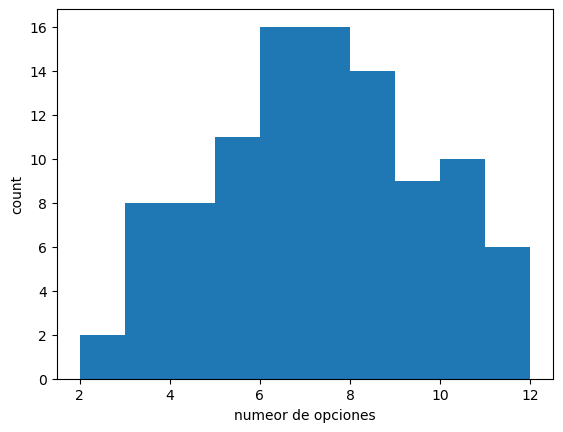

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# numeor semilla random para que la aleatoriedad sea la misma
np.random.seed(11)
# 1 el numeor minimo de 7 numeros total de 100 tiros
dado1 = np.random.randint(1,7,100) 
dado2 = np.random.randint(1,7,100)


# sumamos los dados 
totalSuma = dado1+dado2
#cremamos histograma
plt.hist(totalSuma, bins = 10)

#labels
plt.xlabel('numeor de opciones')
plt.ylabel('count')
plt.show()

In [2]:
iguales = 0

for r in range(100):
    if dado1[r] == dado2[r]:
        iguales +=1
        
print('posibilidad de iguales: ',iguales/100)

posibilidad de iguales:  0.17


In [3]:
suma = 0
# for de 100 tiradas
for t in range(100):
    count = 0
    for r in range(3):
        dado1 = np.random.randint(1,7) 
        dado2 = np.random.randint(1,7)
        if dado1 == dado2:
            count +=1
            
    if count == 3:
        suma +=1
        
print('posibilidad de 3 veces iguales',suma/100)

posibilidad de 3 veces iguales 0.0


## A2: BINOMIAL

Somos un banco y sabemos que la probabilidad de que un usuario al que le hacemos un prestamo deje de pagar es de p=0.05. 

Vamos a hacer una simulación y dejar 100 prestamos: ¿Cuántos nos han dejado de pagar?



In [4]:
# Binomial 100 prestamos
from scipy.stats import binom
np.random.seed(36)
# 1 prestamos a 100 personas 0.05 provabilidad que no paguen
res = binom.rvs(100,0.05,size = 1)
print(sum(res))

6


Ahora vamos a dejar 100 prestamos 1000 veces. ¿Cuantas veces nos han dejado de pagar más de 7 usuarios?

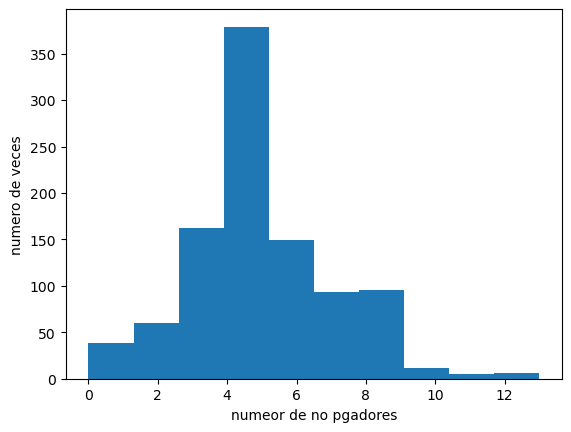

0.118
0.12796047862037896


In [15]:
# Calcula binomial 1000 p=0.05 1000 repeticiones
np.random.seed(36)
res = binom.rvs(100,0.05,size = 1000)
# Muestra histograma
plt.hist(res)
plt.ylabel('numero de veces')
plt.xlabel('numeor de no pgadores')
plt.show()
# responde la pregunta

#provabilidad observacional
print(sum(res > 7)/1000)

#provabilidad real
#dejen de agar 7 o mas (sin el 1- serie 7 o menos)
prob7 = binom.cdf(7,100,0.05)
print(1-prob7)



Si nos dejan de pagar más de 10 veces al dejar 100 prestamos, entramos en bancarota cual es la probabilidad de que eso haya sucedido en nuestro experimiento?

Coincide con la probabilidad real (scipy stats binomial.cdf)

0.009
0.011472410067484673


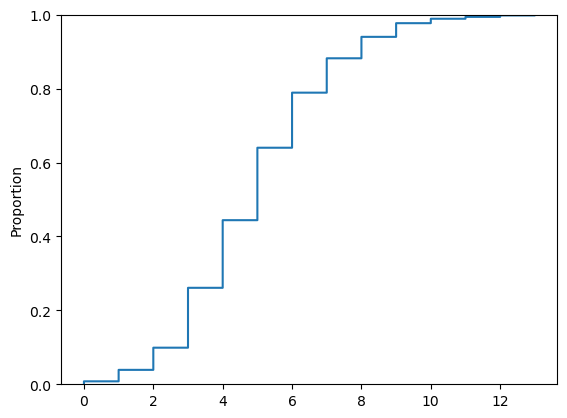

In [6]:
import seaborn as sns
# Muestra  gràfico ecdf
sns.ecdfplot(res)

#Haz el cálculo
# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
res = binom.rvs(100,0.05,size = 1000)
print(sum(res > 10)/1000)

prob10 = binom.cdf(10,100,0.05)
print(1-prob10)
# Compute and print probability of losing money


In [16]:
# Cual es el resultado si envez de dejar 1000 veces 1000 prestamos dejamos 100000 veces
np.random.seed(36)
print(sum(res > 10)/100000)

0.00011


In [8]:
from scipy.stats import binom
import numpy as np

# Calcula de manera inferencial
#provabilidad que me dejen de pagar 5 o mas.
print(1-binom.cdf(5,100,0.05))
#cantidad de personas a partir de la cual se que el 80% esta acumulado.
print(binom.ppf(0.8,100,0.05))

0.3840008720438586
7.0


## ACTIVIDAD 3 - POISSON
Pensando en Sergio Ramos, la probabilidad de que un jugador concreto meta un gol que ha acabado siendo decisivo una eliminatoria a partir del minuto 92, ha pasado 25 veces en 540 eliminatorias.


* ¿Cual és la probabilidad que un jugador decida dos o màs eliminatorias con un gol a partir del min 92 (simula 10000 eliminatorias)?

* Si sergio Ramos ha jugado 20 eliminatorias y ha decidido dos veces, ¿cual es su probabilidad de que decida dos eliminatòrias o màs un jugador como él ?

* ¿Cual és la porbabilidad de que un jugador como Sergio Ramos decida concretamente 2 elminatorias (pmf)

In [17]:
# Draw 10,000 samples out of Poisson distribution: n_goals92
from scipy.stats import poisson
np.random.seed(36)

#cdf me hae la proporcion a la baja(1- a la alta)
n_goals92 = poisson.cdf(1,25/540)
print('la probabilidad decidad una o menos',n_goals92)
print('la probabilidad decidad una o mas eliminatorial',(1-n_goals92)*100)
# Comprueba que suceda 2 veces o màs


la probabilidad decidad dos o menos 0.9989608355974957
la probabilidad decidad dos o mas eliminatorial 0.1039164402504289


In [18]:
# Comprueba en el caso de Sergio Ramos
n_goals92 = poisson.cdf(1,2/20)
print('la probabilidad Sergio decidad una o menos',n_goals92)
print('la probabilidad Sergio decidad una o mas eliminatorial',(1-n_goals92)*100)

la probabilidad Sergio decidad una o menos 0.9953211598395555
la probabilidad Sergio decidad una o mas eliminatorial 0.46788401604445085


In [20]:
justo2 = poisson.pmf(2,2/20)
print(justo2*100)
#pmf me hace la de 1 en concreto(sergio ramos marque 1 justo o 0 justo)
justo0 = poisson.pmf(0,2/20)
justo1 = poisson.pmf(1,2/20)

print(justo0+justo1)

0.4524187090179801
0.9953211598395555


## ACTIVIDAD 3 - NORMAL

Disponemos de un dataSet con los tratos de Amir (no diferenciamos entre ganados y perdidos).

*   Muestra en un histograma el campo 'amount' de Amir. ¿ Qué distribución sigue? Obtén sus parámetros estadísiticos básicos (media, desviación)



In [26]:
import pandas as pd

datasetAmir = pd.read_csv('amir_deals.csv')
datasetAmount = datasetAmir['amount']
datasetAmount.describe()

Amirmean = np.mean(datasetAmir['amount'])
Amirstd = np.std(datasetAmir['amount'])

Responde las siguientes preguntas sobre los tratos de Amir:


*   ¿Cuál es la probabilidad de cerrar un trato menor de 7500€?
*   ¿Cuál es la probabilidad de cerrar un trato mayor de 1000€?
*   ¿Cuál es la probabilidad de cerrar un trato entre 3000€ y 5000€?
*   ¿Cuál es la cantidad a partir de la qual el 25% de los tratos son menores que ellas?



In [31]:
from scipy.stats import norm
print('cerrar trato menos de 7500', norm.cdf(7500,Amirmean,Amirstd))

print('cerrar trato mayor de 7500', 1-norm.cdf(1000,Amirmean,Amirstd))

print('cerrar un trato entre 3000 y 5000',norm.cdf(5000,Amirmean,Amirstd)-norm.cdf(3000,Amirmean,Amirstd))

print('menores de 25% ', norm.ppf(0.25,Amirmean,Amirstd))


cerrar trato menos de 7500 0.9048507292128808
cerrar trato mayor de 7500 0.9683695021571027
cerrar un trato entre 3000 y 5000 0.34784069674502005
menores de 25%  3427.6885699296663


## ACTIVIDAD 3 - EXPONENCIAL

Sabemos que un reparitdor del BurguerKing es capaz de realizar un pedido cada 0.15h. Responde a las siguientes preguntas:

*   ¿Cual es la probabilidad de que tarde más de 25 min en hacer un pedido?
*   ¿Cual es la probabilidad de que tarde entre 15min y 25 min?



In [34]:
np.random.seed(36)
# 100 repartos y tarda 15 min en realizar 1 
from scipy.stats import expon

print('el tiempo que tarde menos de 25 min',expon.cdf(25,scale=15))
print('el tiempo que tarde mas de 25 min',1-expon.cdf(25,scale=15))

print('probabilida que tarde entre 15 y 25 es de ',expon.cdf(25,scale=15)-expon.cdf(15,scale=15))

el tiempo que tarde menos de 25 min 0.8111243971624382
el tiempo que tarde mas de 25 min 0.18887560283756177
probabilida que tarde entre 15 y 25 es de  0.17900383833388056
